In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# df = pd.read_csv('daily_temps.csv', index_col='DATE', parse_dates=True)
# df = pd.read_csv('abcd.csv', index_col='Date', parse_dates=True)
# df = df.rename(columns={'Daily_minimum_temperatures': 'AvgTemp'})
# df = df.dropna()
# print(df.shape)
# df.head()

# sns.get_dataset_names()

df = sns.load_dataset('flights')
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()


,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


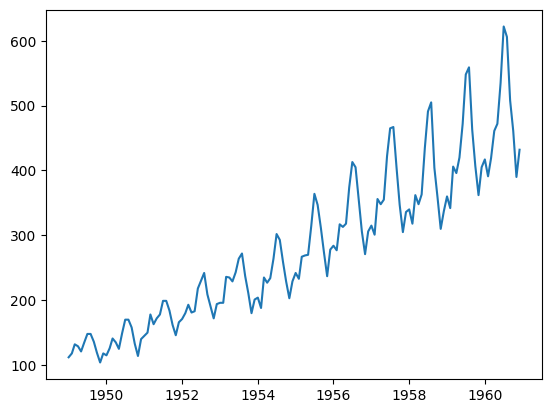

In [12]:
plt.plot(df.index,df.passengers)

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.passengers)

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [20]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
air_df['shift'] = air_df['passengers'].shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


In [26]:
airP = df[['passengers']].copy(deep=True)
airP['firstdiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)

airP.head(15)

,passengers,firstdiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


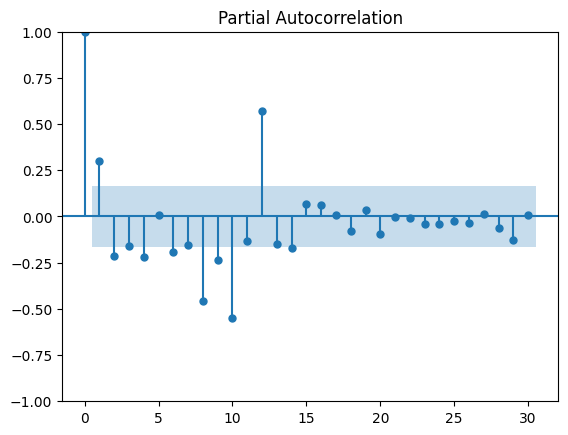

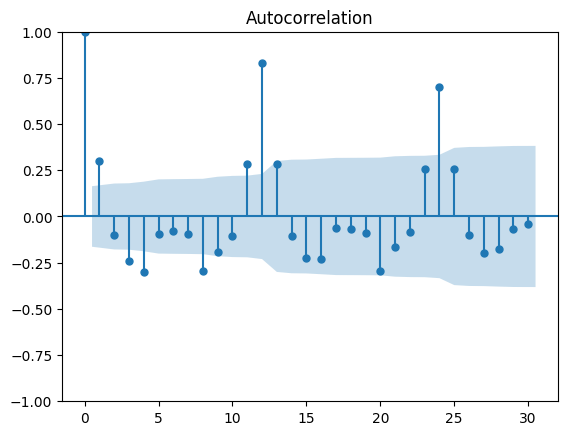

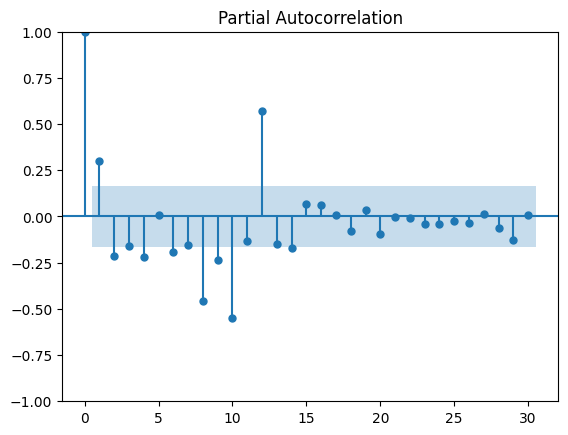

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(airP['firstdiff'].dropna(), lags=30)
plot_pacf(airP['firstdiff'].dropna(), lags=30)

In [35]:
train = airP[:round(len(airP)*0.8)]
test = airP[round(len(airP)*0.8):]

test.head()

,passengers,firstdiff,Diff12
yearMonth,,,
1958-08-01,505,14.0,38.0
1958-09-01,404,-101.0,0.0
1958-10-01,359,-45.0,12.0
1958-11-01,310,-49.0,5.0
1958-12-01,337,27.0,1.0


In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train['passengers'], order=(4,1,3), seasonal_order=(2,1,4,12))
model_fit = model.fit()
pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
airP['sarimaxPred'] = pred

/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23308D+00    |proj g|=  1.10998D-01

At iterate    5    f=  3.20158D+00    |proj g|=  1.72901D-02

At iterate   10    f=  3.18705D+00    |proj g|=  4.23206D-02

At iterate   15    f=  3.17809D+00    |proj g|=  2.46134D-02

At iterate   20    f=  3.17631D+00    |proj g|=  5.22801D-03

At iterate   25    f=  3.17484D+00    |proj g|=  7.91609D-03

At iterate   30    f=  3.17443D+00    |proj g|=  1.49612D-02

At iterate   35    f=  3.17418D+00    |proj g|=  2.19903D-03

At iterate   40    f=  3.17414D+00    |proj g|=  4.24720D-03

At iterate   45    f=  3.17398D+00    |proj g|=  4.22034D-03


/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.17389D+00    |proj g|=  2.60339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     60      1     0     0   2.603D-03   3.174D+00
  F =   3.1738936239610087     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [55]:
len(airP['passengers'])

144

<Axes: xlabel='yearMonth', ylabel='passengers'>

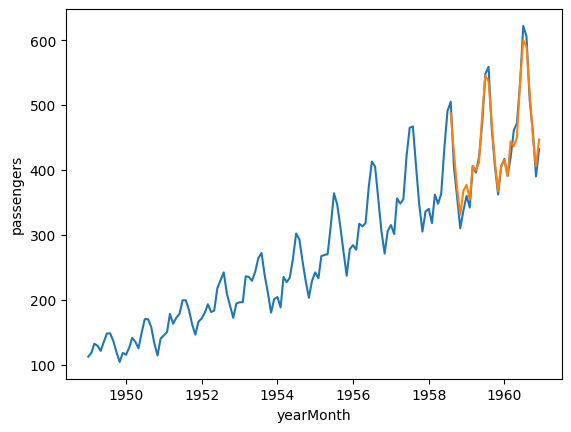

In [49]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
# sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [46]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(airP['passengers'],pred))

ValueError: Found input variables with inconsistent numbers of samples: [144, 29]

In [ ]:
df['AvgTemp'].plot(figsize=(10, 5))

# Checking For Stationarity
If p< 0.05 ; Data is stationary<br>if p>0.05; Data is not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['AvgTemp'])
print('p-value: {}'.format(result[1]))  

In [47]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['passengers'], trace=True, suppress_warnings=True)

/Users/SAGOR/Unknown/CSM_Lab/csm_venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['AvgTemp'], order=(3, 0, 1))
model = model.fit()
model.summary()

# import statsmodels.api as sm
# model = sm.tsa.arima.ARIMA(train['AvgTemp'], order=(1, 0, 5))
# model = model.fit()
# print(model.summary())

In [ ]:
start=len(train)
end=len(train)+len(test)-1
# pred=model.predict(start=3500,end=end,typ='levels').rename('ARIMA Predictions')
pred=model.predict(start=3600,end=end,dynamic=False).rename('ARIMA Predictions')

# print(pred)

# pred.plot(legend=True)
# test['AvgTemp'].plot(legend=True)

pred.reset_index(drop=True).plot(legend=True)
df['AvgTemp'].iloc[3600:end].reset_index(drop=True).plot(legend=True)